In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_trend_atemp_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [5]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('atemp','casual','registered','cnt')
group_df = group_df.groupBy('atemp').mean()
group_df = group_df.select('atemp',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('atemp').alias('aTemp'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
aTemp,0.0152,0.0303,0,0.0455,0.0758,0.0606,0.1667,0.1061,0.1364,0.1515,...,0.6818,0.9091,0.7121,0.7424,0.803,0.6212,0.6515,0.7727,0.7576,0.7273
Average Casual,0.00,0.62,2.00,0.11,1.25,1.71,3.35,3.14,3.71,3.21,...,75.30,54.40,74.69,78.05,76.20,75.06,79.08,87.09,79.20,90.13
Average Registered,3.25,13.25,17.50,32.56,33.07,47.29,49.08,57.03,56.84,58.29,...,232.26,253.60,236.53,235.13,237.56,240.18,248.88,244.51,261.96,254.07
Average CNT,3.25,13.88,19.50,32.67,34.32,49.00,52.43,60.17,60.56,61.50,...,307.56,308.00,311.22,313.18,313.76,315.24,327.96,331.60,341.17,344.20


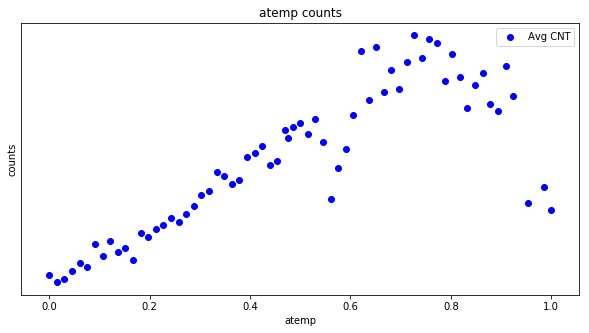

In [6]:
import matplotlib.pyplot as plt
import numpy as np

group_df = group_df.toPandas()

plt.scatter(group_df['aTemp'], group_df['Average CNT'], color='b')
#plt.scatter(group_df['aTemp'], group_df['Average Registered'], color='g')
#plt.scatter(group_df['aTemp'], group_df['Average Casual'], color='r')

plt.yticks([]) #disable yticks
plt.legend(['Avg CNT'])
plt.xlabel('atemp')
plt.ylabel('counts')
plt.title('atemp counts')
plt.show()

In [4]:
plt.rcParams['figure.figsize'] = (10,5)